In [1]:
import mfpy
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Reading tir file
tir_file = r'samples/sample.tir' #Tir file
tir_coeff = mfpy.PreProcessing.read_tir(tir_file) #Convert .tir file in a dict

#### Longitudinal slip (alpha = 0)

##### Fz = 5000 N

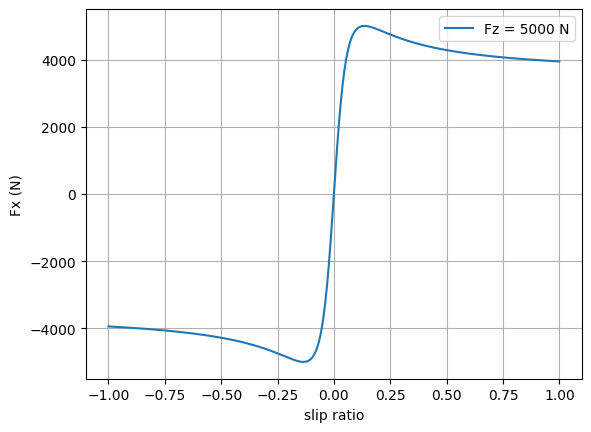

In [5]:
#Inputs
N_points = 500

alpha = np.zeros(N_points) #Slip angle (rad)
kappa = np.linspace(-1,1,N_points) #Slip ratio (%/100) 
Fz = np.ones(N_points)*5000 #Fz (N)
gamma = np.zeros(N_points) #Inclination angle (rad)
Vx = np.ones(N_points) #Longitudinal speed (m/s)

input_values = [alpha, kappa, gamma, Fz, Vx] #input values -> list

result = mfpy.solve(input_values,tir_coeff,check_limits=False) #Solving

#Graph
fig,ax1 = plt.subplots(1,1)
ax1.set_xlabel('slip ratio')
ax1.set_ylabel('Fx (N)')
ax1.grid()
ax1.plot(result.kappa,result.FX,label='Fz = 5000 N')
ax1.legend()


##### Fz = 500 to 5000 N

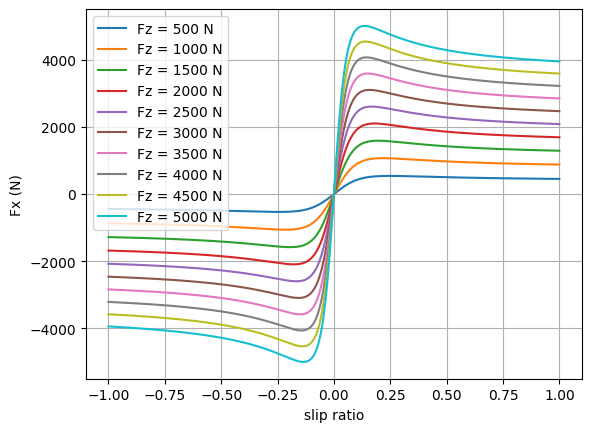

In [4]:
#Inputs
N_points = 500 
alpha = np.zeros(N_points) #Slip angle (rad)
kappa = np.linspace(-1,1,N_points) #Slip ratio (%/100)
gamma = np.zeros(N_points) #Inclination angle (rad)
Vx = np.ones(N_points) #Longitudinal speed (m/s) 

fig,ax1 = plt.subplots(1,1)
ax1.set_xlabel('slip ratio')
ax1.set_ylabel('Fx (N)')
ax1.grid()
for i in range(1,11):
    Fz = np.ones(N_points)*500*i
    input_values = [ alpha, kappa, gamma, Fz, Vx]
    result = mfpy.solve(input_values,tir_coeff,check_limits=False) #Solving
    ax1.plot(result.kappa,result.FX,label='Fz = {} N'.format(500*i))
ax1.legend()

#### Pure cornering (kappa = 0)

##### Fz = 500 to 5000 N

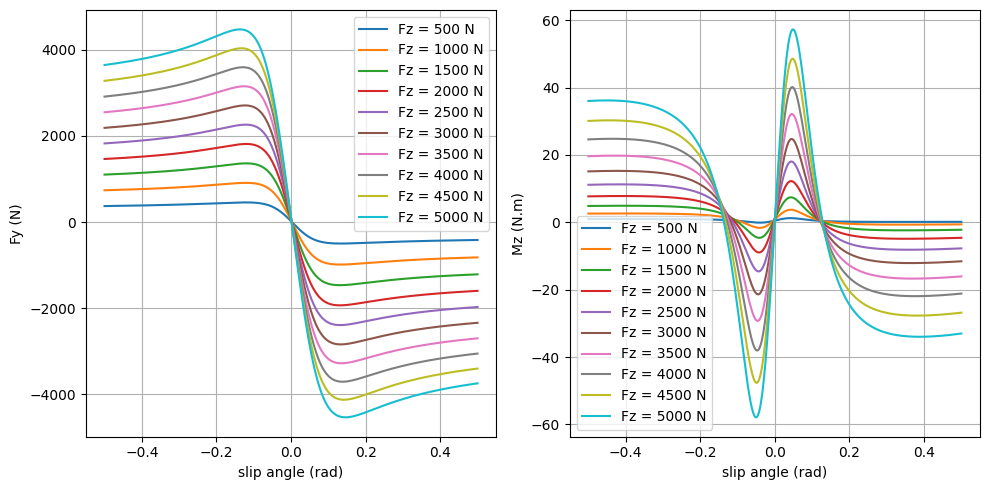

In [5]:
#Inputs
N_points = 500 
alpha = np.linspace(-0.5,0.5,N_points) #Slip angle (rad)
kappa= np.zeros(N_points) #Slip ratio (%/100)
gamma = np.zeros(N_points) #Inclination angle (rad)
Vx = np.ones(N_points) #Longitudinal speed (m/s) 

#Graph
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.set_xlabel('slip angle (rad)')
ax1.set_ylabel('Fy (N)')
ax1.grid()
ax2.set_xlabel('slip angle (rad)')
ax2.set_ylabel('Mz (N.m)')
ax2.grid()
for i in range(1,11):
    Fz = np.ones(N_points)*500*i
    input_values = [ alpha, kappa, gamma, Fz, Vx]
    result = mfpy.solve(input_values,tir_coeff,check_limits=False) #Solving
    ax1.plot(result.alpha,result.FY,label='Fz = {} N'.format(500*i))
    ax2.plot(result.alpha,result.MZ,label='Fz = {} N'.format(500*i))
ax1.legend()
ax2.legend()
fig.tight_layout()


### Combined (traction circle)

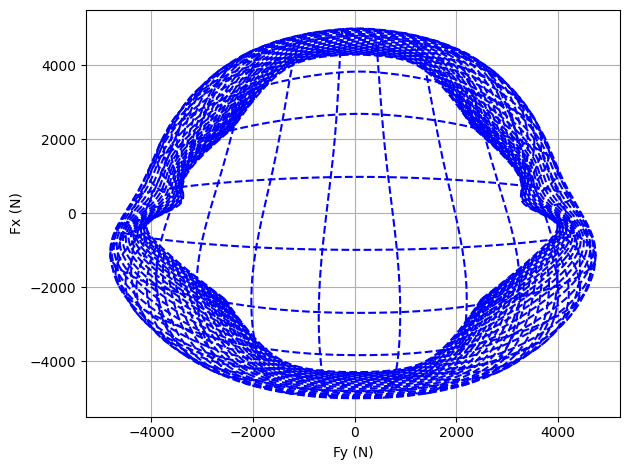

In [6]:
N_points = 500 
Fz = np.ones(N_points)*5000
gamma = np.zeros(N_points) #Inclination angle (rad)
Vx = np.ones(N_points) #Longitudinal speed (m/s) 
alpha = np.linspace(-0.49,0.49,N_points)


fig,ax1 = plt.subplots(1,1)
ax1.set_xlabel('Fy (N)')
ax1.set_ylabel('Fx (N)')
ax1.grid()

for i in np.linspace(-0.49,0.49,50):
    kappa = np.ones(N_points)*i
    input_values = [ alpha, kappa, gamma, Fz, Vx]
    result = mfpy.solve(input_values,tir_coeff,check_limits=True) #Solving
    ax1.plot(result.FY,result.FX,'b--')

kappa = np.linspace(-0.49,0.49,N_points)
for i in np.linspace(-0.49,0.49,50):
    alpha = np.ones(N_points)*i
    input_values = [ alpha, kappa, gamma, Fz, Vx]
    result = mfpy.solve(input_values,tir_coeff,check_limits=True) #Solving)
    ax1.plot(result.FY,result.FX,'b--')


fig.tight_layout()

### Available Data

In [7]:
#Inputs
N_points = 500

alpha = np.ones(N_points)*0.1 #Slip angle (rad)
kappa = np.linspace(-1,1,N_points) #Slip ratio (%/100) 
Fz = np.ones(N_points)*5000 #Fz (N)
gamma = np.ones(N_points)*0.1 #Inclination angle (rad)
Vx = np.ones(N_points)*10 #Longitudinal speed (m/s)

input_values = [alpha, kappa, gamma, Fz, Vx] #input values -> list

result = mfpy.solve(input_values,tir_coeff,check_limits=False) #Solving
print(result._fields)

('alpha', 'kappa', 'gamma', 'VX', 'FX', 'FY', 'muX', 'muY', 'FZ', 'MX', 'MY', 'MZ', 't', 's', 'FX0', 'FY0', 'MZ0', 'MZr0', 't0', 'Re', 'rho', 'omega')
